Shannon Bohman 

UNI: smb2317

Research Computing in Earth Science 

Final Project

In [103]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import scipy
from scipy import stats
from numpy.polynomial.polynomial import polyfit
%matplotlib inline
%config inlinebackend.figure_format='retina'

Download the global ARMOR3D L4 Reprocessed dataset, obtained by combining satellite (Sea Level Anomalies, Geostrophic Surface Currents, Sea Surface Temperature) and in-situ (Temperature and Salinity profiles) observations through statistical methods:

In [2]:
! wget https://ndownloader.figshare.com/files/19181201

Open the dataset and average over depth since it contains only the surface level:

In [3]:
ds = xr.open_dataset('19181201').mean(dim='depth')
ds

//anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:    (latitude: 88, longitude: 89, time: 574)
Coordinates:
  * latitude   (latitude) float32 1.125 1.375 1.625 ... 22.375 22.625 22.875
  * time       (time) datetime64[ns] 1999-01-06 1999-01-13 ... 2009-12-30
  * longitude  (longitude) float32 77.875 78.125 78.375 ... 99.375 99.625 99.875
Data variables:
    mlotst     (time, latitude, longitude) float32 27.699951 28.899902 ... nan
    zo         (time, latitude, longitude) float32 0.814 0.81600004 ... nan nan
    to         (time, latitude, longitude) float32 28.059 28.16 ... nan nan
    so         (time, latitude, longitude) float32 34.938 34.95 ... nan nan
    ugo        (time, latitude, longitude) float32 -0.053000003 ... nan
    vgo        (time, latitude, longitude) float32 0.027 0.022000002 ... nan nan

Define an anomaly function:

In [4]:
def anom(x):
    return x-x.mean()

____
## Basemap

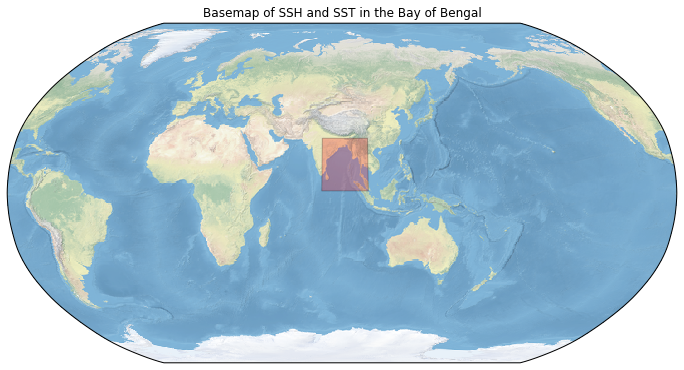

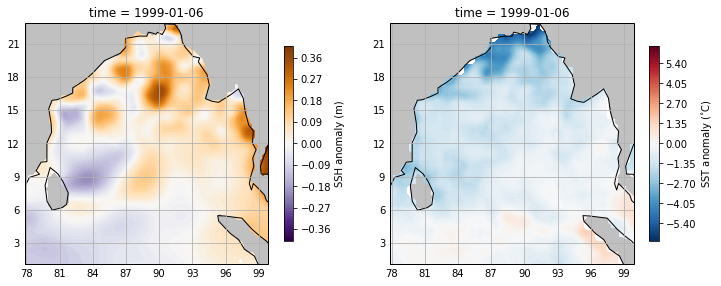

In [202]:
import matplotlib.patches as mpatches

extent = [np.min(ds.longitude),np.max(ds.longitude),np.min(ds.latitude),np.max(ds.latitude)]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

fig0 = plt.figure(figsize=(12,12))

ax0 = fig0.add_subplot(111,projection=ccrs.Robinson(central_longitude=central_lon))
ax0.stock_img()
ax0.add_patch(mpatches.Rectangle(xy=[78, 1], width=25, height=25,
                                    facecolor='red',
                                    edgecolor='k',
                                    alpha=0.25,
                                    transform=ccrs.PlateCarree()))
ax0.set_title('Basemap of SSH and SST in the Bay of Bengal')

fig1 = plt.figure(figsize=(12,12))

ax1 = fig1.add_subplot(121,projection=ccrs.PlateCarree())
ax1.set_extent(extent)
ax1.coastlines()
gl1 = ax1.gridlines()
gl1.xlabels_top = False
gl1.xlabels_bottom = True
gl1.ylabels_right = False
gl1.ylabels_left =True
anom(ds.zo).isel(time=0).plot.contourf(ax=ax1,
                                       transform=ccrs.PlateCarree(),
                                       cmap='PuOr_r',
                                       cbar_kwargs={'shrink': 0.3,'label':'SSH anomaly (m)'},
                                       levels=100)
ax1.add_feature(cartopy.feature.LAND,color='#C0C0C0',edgecolor='k',linewidth=10)

ax2 = fig1.add_subplot(122,projection=ccrs.PlateCarree())
ax2.set_extent(extent)
ax2.coastlines()
gl = ax2.gridlines()
gl.xlabels_top = False
gl.xlabels_bottom = True
gl.ylabels_right = False
gl.ylabels_left =True
anom(ds.to).isel(time=0).plot.contourf(ax=ax2,
                                       transform=ccrs.PlateCarree(),
                                       cmap='RdBu_r',
                                       cbar_kwargs={'shrink': 0.3,'label':r'SST anomaly ($^{\circ}$C)'},
                                       levels=100)
ax2.add_feature(cartopy.feature.LAND,color='#C0C0C0',edgecolor='k')

plt.show()

____
## Determine seasonal mean patterns:

In [11]:
for i in np.arange(1,13):
    if i == 1 or i == 2 or i == 12:
        winter_zo = ds.zo.where(ds.time.dt.month==i).mean(dim='time')
        winter_to = ds.to.where(ds.time.dt.month==i).mean(dim='time')
    elif i == 3 or i == 4 or i == 5:
        spring_zo = ds.zo.where(ds.time.dt.month==i).mean(dim='time')
        spring_to = ds.to.where(ds.time.dt.month==i).mean(dim='time')
    elif i == 6 or i == 7 or i == 8:
        summer_zo = ds.zo.where(ds.time.dt.month==i).mean(dim='time')
        summer_to = ds.to.where(ds.time.dt.month==i).mean(dim='time')
    elif i == 9 or i == 10 or i == 11:
        fall_zo = ds.zo.where(ds.time.dt.month==i).mean(dim='time')
        fall_to = ds.to.where(ds.time.dt.month==i).mean(dim='time')

//anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
//anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
//anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
//anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
//anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
//anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
//anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty sli

In [12]:
szn = ['Winter','Spring','Summer','Fall']

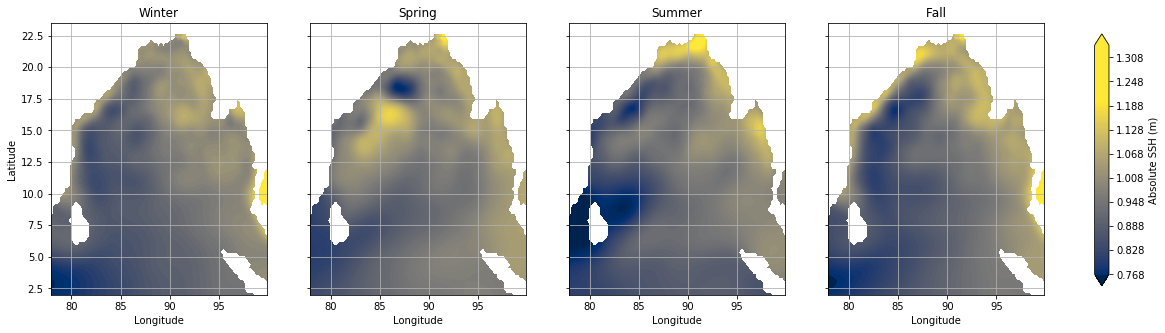

In [191]:
fig,ax = plt.subplots(figsize=(20,5),nrows=1,ncols=4,sharey=True)

plot0 = ax[0].contourf(ds.longitude,ds.latitude,winter_zo,levels=100,vmin=0.73,vmax=1.2,extend='both',cmap='cividis')
plot1 = ax[1].contourf(ds.longitude,ds.latitude,spring_zo,levels=100,vmin=0.73,vmax=1.2,extend='both',cmap='cividis')
plot2 = ax[2].contourf(ds.longitude,ds.latitude,summer_zo,levels=100,vmin=0.73,vmax=1.2,extend='both',cmap='cividis')
plot3 = ax[3].contourf(ds.longitude,ds.latitude,fall_zo,levels=100,vmin=0.73,vmax=1.2,extend='both',cmap='cividis')

for i in np.arange(0,4):
    ax[i].set_title(szn[i])
    ax[i].set_xlabel('Longitude')
    ax[i].grid()
    plt.ylim([2,23.5])
    if i == 0:
        ax[i].set_ylabel('Latitude')
        
    else:
        ax[i].set_ylabel('')

fig.subplots_adjust(right=0.815)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
fig.colorbar(plot3, cax=cbar_ax,label=r'Absolute SSH (m)')

plt.show()

The western and southern part of the basin seems to be consistently lower than the eastern and northern part.

I am intrigued by the high and low zones just north of 15N and just east of  85E.

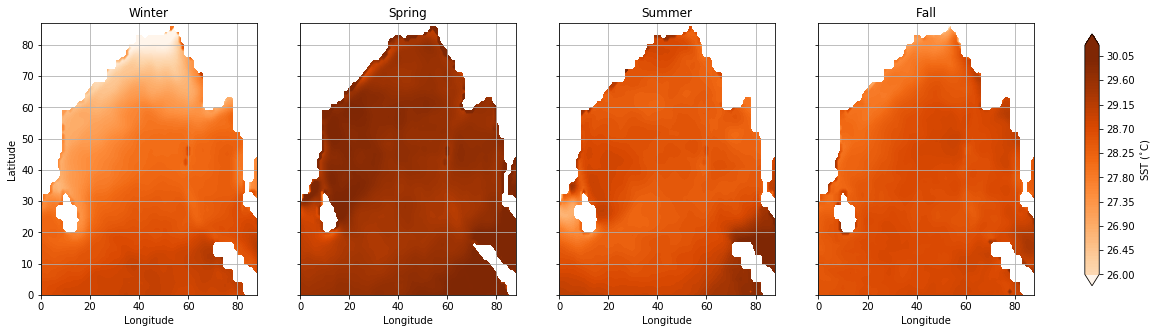

In [14]:
fig,ax = plt.subplots(figsize=(20,5),nrows=1,ncols=4,sharey=True)

plot0 = ax[0].contourf(winter_to,levels=100,vmin=25,vmax=30,extend='both',cmap='Oranges')
plot1 = ax[1].contourf(spring_to,levels=100,vmin=25,vmax=30,extend='both',cmap='Oranges')
plot2 = ax[2].contourf(summer_to,levels=100,vmin=25,vmax=30,extend='both',cmap='Oranges')
plot3 = ax[3].contourf(fall_to,levels=100,vmin=25,vmax=30,extend='both',cmap='Oranges')

for i in np.arange(0,4):
    ax[i].set_title(szn[i])
    ax[i].set_xlabel('Longitude')
    ax[i].grid()
    if i == 0:
        ax[i].set_ylabel('Latitude')
    else:
        ax[i].set_ylabel('')

fig.subplots_adjust(right=0.815)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
fig.colorbar(plot3, cax=cbar_ax,label=r'SST ($^{\circ}$C)')

plt.show()

On average, spring is the warmest time of the basin. There aren't very strong spatial patterns to the temperature distribution. 

_______
## Mixed layer depth and sea surface height

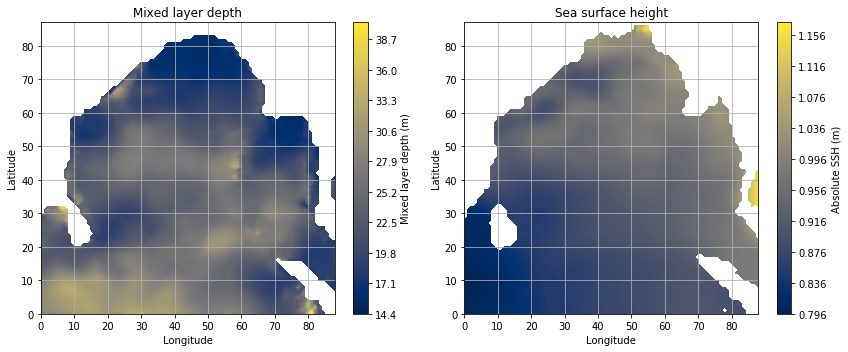

In [162]:
fig, ax = plt.subplots(figsize=(12,5),nrows=1,ncols=2)

plot0 = ax[0].contourf(ds.mlotst.mean(dim='time'),levels=100,cmap='cividis')
ax[0].grid()
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].set_title('Mixed layer depth')

plot1 = ax[1].contourf(ds.zo.mean(dim='time'),levels=100,cmap='cividis')
ax[1].grid()
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')
ax[1].set_title('Sea surface height')

plt.colorbar(plot0,ax=ax[0],label='Mixed layer depth (m)')
plt.colorbar(plot1,ax=ax[1],label='Absolute SSH (m)')

plt.tight_layout()
plt.show()

In [163]:
# Determine correlation coefficient and p-value of the zonal means of mixed layer depth and SSH:
R = scipy.stats.pearsonr(ds.zo.mean(dim=['time','latitude']),ds.mlotst.mean(dim=['time','latitude']))[0]
p = scipy.stats.pearsonr(ds.zo.mean(dim=['time','latitude']),ds.mlotst.mean(dim=['time','latitude']))[1]

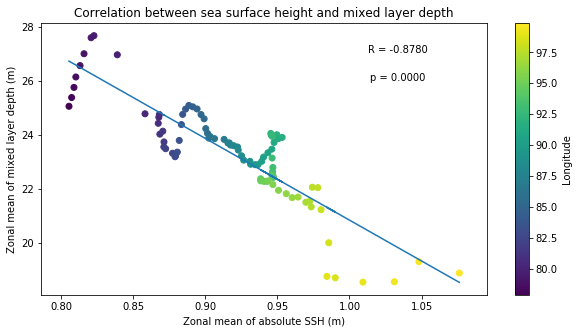

In [164]:
x = ds.zo.mean(dim=['time','latitude'])
y = ds.mlotst.mean(dim=['time','latitude'])
b, m = polyfit(x, y, 1) # Find slope and y-intercept of trendline

fig,ax = plt.subplots(figsize=(10,5))
plot = ax.scatter(ds.zo.mean(dim=['time','latitude']),ds.mlotst.mean(dim=['time','latitude']),c=ds.longitude)
ax.set_xlabel('Zonal mean of absolute SSH (m)')
ax.set_ylabel('Zonal mean of mixed layer depth (m)')
ax.set_title('Correlation between sea surface height and mixed layer depth')
ax.plot(x, (m*x+b), '-') # Plot trendline

# Display R and p value:
plt.text(0.8, 0.9,r'R = %.4f'%R, horizontalalignment='center',
     verticalalignment='center',
     transform=ax.transAxes)
plt.text(0.8, 0.8,r'p = %.4f'%p, horizontalalignment='center',
     verticalalignment='center',
     transform=ax.transAxes)

plt.colorbar(plot,label='Longitude')

plt.show()

This figure demonstrates that mixed layer depth and sea surface height are negatively correlated to an acceptable significance level.

_____
## Propagation

In [15]:
timeframe = ds.sel(time=slice('1999-01-06','1999-02-10')).time # Slice a timeframe of about one month

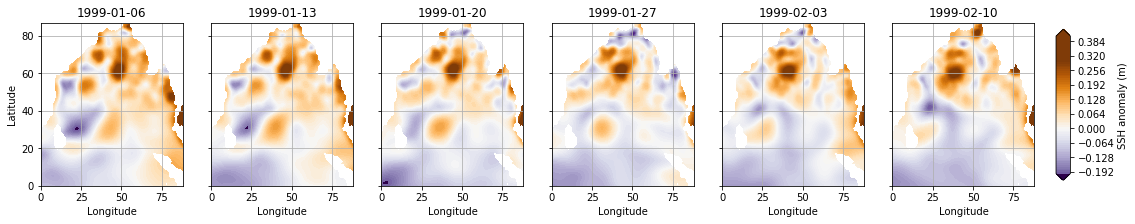

In [21]:
fig,ax = plt.subplots(figsize=(20,3),ncols=len(timeframe),nrows=1,sharey=True)

for i in np.arange(len(timeframe)):
    plot = ax[i].contourf(anom(ds.zo).isel(time=i),levels=100,cmap='PuOr_r',vmin=-0.3,vmax=0.3,extend='both')
    ax[i].set_xlabel('Longitude')
    ax[i].grid(':')
    ax[i].set_title(str(timeframe[i])[36:46])
        
ax[0].set_ylabel('Latitude')
    
fig.subplots_adjust(right=0.815)
cbar_ax = fig.add_axes([0.83, 0.15, 0.01, 0.7])
fig.colorbar(plot, cax=cbar_ax,label=r'SSH anomaly (m)')

plt.show()

It appears anomalous events are moving westward. A Hovmoller diagram would provide more precise answers:

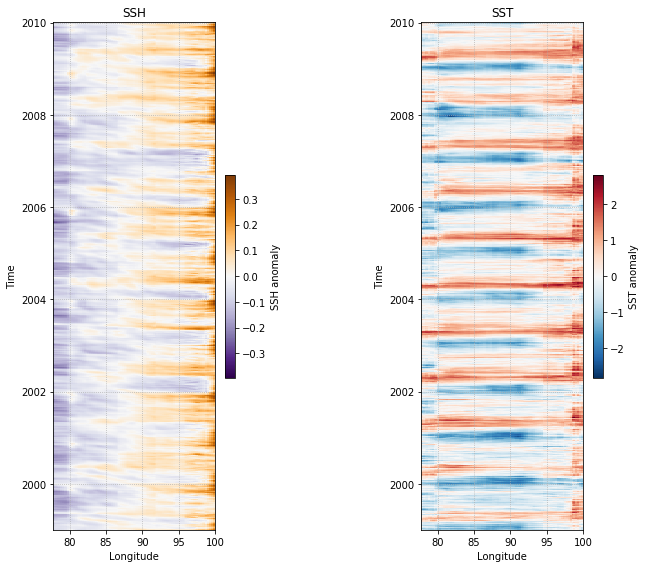

In [203]:
fig,ax = plt.subplots(figsize=(9,8),nrows=1,ncols=2)

plot0 = anom(ds.zo).mean(dim='latitude').plot(ax=ax[0],cmap='PuOr_r',cbar_kwargs={'shrink': 0.4,'label':'SSH anomaly'})
ax[0].set_title('SSH')
ax[0].set_ylabel('Time')
ax[0].set_xlabel('Longitude')
ax[0].grid(which='major',linestyle=':')

plot1 = anom(ds.to).mean(dim='latitude').plot(ax=ax[1],cbar_kwargs={'shrink': 0.4,'label':'SST anomaly'})
ax[1].set_title('SST')
ax[1].set_ylabel('Time')
ax[1].set_xlabel('Longitude')
ax[1].grid(which='major',linestyle=':')


plt.tight_layout(w_pad = 10)
plt.show()

Seasonality dominates the SST plot, but the slant of the SSH stripes indicate westward movement. Zoom in to determine velocity:

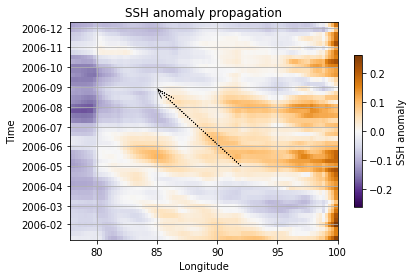

In [204]:
fig,ax = plt.subplots()

anom(ds.zo.sel(time=slice('2006-01-06','2006-12-06'))).mean(dim='latitude').plot(ax=ax,cmap='PuOr_r',
                                                                                       cbar_kwargs={'shrink': 0.7,'label':'SSH anomaly'})
                                                                                      
ax.grid()
ax.arrow(92,'2006-05',-7,120,length_includes_head=True,
          head_width=1,head_length=15,overhang=1,linestyle=':')
ax.set_title('SSH anomaly propagation')
ax.set_ylabel('Time')
ax.set_xlabel('Longitude')

plt.show()

The orange streak starting on 2006-05 at 92E moves to 85E by 2006-09. That's 7 degrees westward in 4 months, or $(7*100\text{ km})/(124\text{ days}) \sim 5.65\text{ km/day} \sim 6.54\text{ cm/s}$.